<a href="https://colab.research.google.com/gist/Conal97/8c7a731b168a89d513f85bc5edbff363/stochastic-szr-and-sir-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing packages

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Stochastic SIR model**

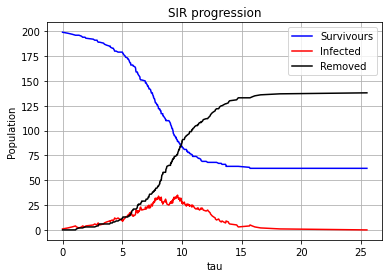

In [2]:
# Input parameters

N = 200 # population

T = 100.0 # maximum elapsed time

t = 0.0 # start time

mu = 0.6

n_I = 1 # initial infected population

# compute susceptible population, set recovered to zero

n_S = N - n_I
n_R = 0

# initialise results list

SIR_data = []
SIR_data.append((t, n_S, n_I, n_R))

# main loop

while t < T:

	if n_I == 0:
		break

	w1 = n_S * n_I / N
	w2 = mu * n_I
	W = w1 + w2

	dt = -math.log(random.uniform(0.0,1.0)) / W
	t = t + dt
	
	if random.uniform(0.0,1.0) < w1 / W:
		n_S = n_S - 1
		n_I = n_I + 1

	else:
		n_I = n_I - 1
		n_R = n_R + 1

	SIR_data.append((t, n_S, n_I, n_R))

with open('SIR_data.txt', 'w+') as fp:
    fp.write('\n'.join('%f %i %i %i' % x for x in SIR_data))


# plotting results
tau = np.array(SIR_data)[:,0]
S = np.array(SIR_data)[:,1]
I = np.array(SIR_data)[:,2]
R = np.array(SIR_data)[:,3]

plt.plot(tau, S, "b", label = "Survivours")
plt.plot(tau, I, "r", label = "Infected")
plt.plot(tau, R, "k", label = "Removed")
plt.title("SIR progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()

plt.show()

**Stochastic SZR model**

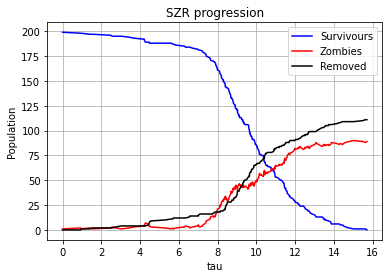

In [3]:
# Input parameters

P = 200 # population

Tmax = 100.0 # maximum elapsed time

time = 0.0 # start time

beta = 0.008

kappa = 0.0048

alpha = kappa/beta

n_Z = 1 # initial infected population

# compute susceptible population, set removed to zero

n_Sus = P - n_Z
n_Rmvd = 0

# initialise results list

SZR_data = []
SZR_data.append((time, n_Sus, n_Z, n_Rmvd))

# main loop

while time < Tmax:

	if n_Sus == 0 or n_Z == 0:
		break

	k1= beta * n_Sus * n_Z
	k2 = kappa * n_Sus * n_Z
	K = k1 + k2

	delta_t = -math.log(random.uniform(0.0,1.0)) / K
	time = time + delta_t
	
	if random.uniform(0.0,1.0) < k1 / K:
		n_Sus = n_Sus - 1
		n_Z = n_Z + 1

	else:
		n_Z = n_Z - 1
		n_Rmvd = n_Rmvd + 1

	SZR_data.append((time, n_Sus, n_Z, n_Rmvd))
 
with open('SZR_data.txt', 'w+') as fp:
    fp.write('\n'.join('%f %i %i %i' % x for x in SZR_data))

# plotting results
tau2 = np.array(SZR_data)[:,0]
S2 = np.array(SZR_data)[:,1]
Z = np.array(SZR_data)[:,2]
R2 = np.array(SZR_data)[:,3]

plt.plot(tau2, S2, "b", label = "Survivours")
plt.plot(tau2, Z, "r", label = "Zombies")
plt.plot(tau2, R2, "k", label = "Removed")
plt.title("SZR progression")
plt.xlabel("tau")
plt.ylabel("Population")
plt.legend()
plt.grid()

plt.show()